In [ ]:
import pandas as pd

# Preprocessing

## Read Data

In [ ]:
path ="https://raw.githubusercontent.com/alwanrahmanas/datslay/main/train.csv"
data = pd.read_csv(path)
data

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,5,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0
...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,BMV,SUBCOMPACT,na,8.0,AS8,Z,33.71 L/100 km,12.99 km per L,4.54 km per L,275.0
137137,137138,GONDA,STATION WAGON - SMALL,1.5,4.0,M6,X,15.41 km per L,0.87 L/100 km,59.38 MPG (AS),166.0
137138,137139,NIRRAN,MID-SIZE,1.8,4.0,AV,X,2.99 liters per 100 km,8.38 L/100 km,52.19 mpg Imp.,181.0
137139,137140,TOYOTI,COMPACT,1.8,4.0,na,X,11.48 L/100km,1275.84 mpg Imp.,0.64 L/10km,123.0


In [ ]:
data.isna().sum()

Id                           0
Make                         0
Vehicle Class             1325
Engine Size(L)           16619
Cylinders                14155
Transmission              2605
Fuel Type                 1855
Fuel Consumption City     2422
Fuel Consumption Hwy      2568
Fuel Consumption Comb     2582
CO2 Emissions(g/km)          0
dtype: int64

##**Data Cleaning**

## 1. Fuel Consumption City, Fuel Consumption Highway, and Fuel Consumption Combine

In [ ]:
data[['Id','Fuel Consumption City','Fuel Consumption Hwy','Fuel Consumption Comb']]

,Id,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,1,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.
1,2,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km
2,3,0.17 L/10km,2.03 liters per 100 km,zero
3,4,6.52 km per L,1.59 L/10km,NaN
4,5,20.15 L/100km,0.60 L/10km,1.38 L/10km
...,...,...,...,...
137136,137137,33.71 L/100 km,12.99 km per L,4.54 km per L
137137,137138,15.41 km per L,0.87 L/100 km,59.38 MPG (AS)
137138,137139,2.99 liters per 100 km,8.38 L/100 km,52.19 mpg Imp.
137139,137140,11.48 L/100km,1275.84 mpg Imp.,0.64 L/10km


### Split With Regex from Value and Unit

In [ ]:
#Split With Regex from Value and Unit
numeric_extract_fuel = pd.DataFrame()
unit_extract_fuel = pd.DataFrame()
clean_fuel = pd.DataFrame()

numeric_extract_fuel['Numeric Fuel City'] = (data['Fuel Consumption City'].str.extract(r'(\d+\.\d+)\s', expand=True))
numeric_extract_fuel['Numeric Fuel Hwy'] = data['Fuel Consumption Hwy'].str.extract(r'(\d+\.\d+)\s', expand=True)
numeric_extract_fuel['Numeric Fuel Comb'] = data['Fuel Consumption Comb'].str.extract(r'(\d+\.\d+)\s', expand=True)
numeric_extract_fuel['id'] = data['Id']

unit_extract_fuel['Unit Fuel City'] = data['Fuel Consumption City'].str.extract(r'\d+\.\d+\s(.+)', expand=True)
unit_extract_fuel['Unit Fuel Hwy'] = data['Fuel Consumption Hwy'].str.extract(r'\d+\.\d+\s(.+)', expand=True)
unit_extract_fuel['Unit Fuel Comb'] = data['Fuel Consumption Comb'].str.extract(r'\d+\.\d+\s(.+)', expand=True)
unit_extract_fuel['id'] = data['Id']

clean_fuel = pd.merge(numeric_extract_fuel, unit_extract_fuel, left_on='id', right_on='id', how='inner')
clean_fuel['Numeric Fuel City'] = pd.to_numeric(clean_fuel['Numeric Fuel City'], errors='coerce')
clean_fuel['Numeric Fuel Hwy'] = pd.to_numeric(clean_fuel['Numeric Fuel Hwy'], errors='coerce')
clean_fuel['Numeric Fuel Comb'] = pd.to_numeric(clean_fuel['Numeric Fuel Comb'], errors='coerce')
#clean_fuel[['Numeric Fuel City','Numeric Fuel Hwy','Numeric Fuel Comb']].apply(pd.to_numeric)
#clean_fuel = clean_fuel[]
clean_fuel = clean_fuel[['id','Numeric Fuel City','Numeric Fuel Hwy','Numeric Fuel Comb','Unit Fuel City','Unit Fuel Hwy','Unit Fuel Comb']]
clean_fuel

,id,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,Unit Fuel City,Unit Fuel Hwy,Unit Fuel Comb
0,1,8.64,6.14,37.59,liters per 100 km,L/100 km,mpg Imp.
1,2,27.27,30.76,28.84,liters per 100 km,liters per 100 km,L/100 km
2,3,0.17,2.03,NaN,L/10km,liters per 100 km,NaN
3,4,6.52,1.59,NaN,km per L,L/10km,NaN
4,5,20.15,0.60,1.38,L/100km,L/10km,L/10km
...,...,...,...,...,...,...,...
137136,137137,33.71,12.99,4.54,L/100 km,km per L,km per L
137137,137138,15.41,0.87,59.38,km per L,L/100 km,MPG (AS)
137138,137139,2.99,8.38,52.19,liters per 100 km,L/100 km,mpg Imp.
137139,137140,11.48,1275.84,0.64,L/100km,mpg Imp.,L/10km


In [ ]:
clean_fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137141 entries, 0 to 137140
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 137141 non-null  int64  
 1   Numeric Fuel City  131093 non-null  float64
 2   Numeric Fuel Hwy   130653 non-null  float64
 3   Numeric Fuel Comb  130651 non-null  float64
 4   Unit Fuel City     131093 non-null  object 
 5   Unit Fuel Hwy      130653 non-null  object 
 6   Unit Fuel Comb     130651 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 8.4+ MB


In [ ]:
clean_fuel['Unit Fuel Comb'].unique()

array(['mpg Imp.', 'L/100 km', nan, 'L/10km', 'MPG (AS)', 'km/L',
       'L/100km', 'km per L', 'liters per 100 km'], dtype=object)

In [ ]:
clean_fuel['Unit Fuel City'].unique()

array(['liters per 100 km', 'L/10km', 'km per L', 'L/100km', 'MPG (AS)',
       'mpg Imp.', nan, 'L/100 km', 'km/L'], dtype=object)

In [ ]:
clean_fuel['Unit Fuel Hwy'].unique()

array(['L/100 km', 'liters per 100 km', 'L/10km', 'mpg Imp.', 'L/100km',
       'km per L', nan, 'km/L', 'MPG (AS)'], dtype=object)

The unit that have to change in L/100 km:

1. liters per 100 km and L/100km

2. L/10 km (multiply with 10)

3. km per L and km/L (change by 100/value)

4. mpg Imp. (change by 282.481/value)

5. MPG AS (change by 235.215/value)

In [ ]:
clean_fuel.loc[(clean_fuel['Unit Fuel City']==('liters per 100 km')) | (clean_fuel['Unit Fuel City']==('L/100km')),'Unit Fuel City']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel City']==('L/10km'),'Numeric Fuel City']= clean_fuel.loc[clean_fuel['Unit Fuel City']==('L/10km'),'Numeric Fuel City']*10
clean_fuel.loc[clean_fuel['Unit Fuel City']==('L/10km'),'Unit Fuel City']= 'L/100 km'

clean_fuel.loc[(clean_fuel['Unit Fuel City']==('km per L')) | (clean_fuel['Unit Fuel City']==('km/L')),'Numeric Fuel City'] = 100/(clean_fuel.loc[(clean_fuel['Unit Fuel City']==('km per L')) | (clean_fuel['Unit Fuel City']==('km/L')),'Numeric Fuel City'])
clean_fuel.loc[(clean_fuel['Unit Fuel City']==('km per L')) | (clean_fuel['Unit Fuel City']==('km/L')),'Unit Fuel City']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel City']==('mpg Imp.'),'Numeric Fuel City']= 282.481/clean_fuel.loc[clean_fuel['Unit Fuel City']==('mpg Imp.'),'Numeric Fuel City']
clean_fuel.loc[clean_fuel['Unit Fuel City']==('mpg Imp.'),'Unit Fuel City']= 'L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel City']==('MPG (AS)'),'Numeric Fuel City']= 235.215/clean_fuel.loc[clean_fuel['Unit Fuel City']==('MPG (AS)'),'Numeric Fuel City']
clean_fuel.loc[clean_fuel['Unit Fuel City']==('MPG (AS)'),'Unit Fuel City']= 'L/100 km'

clean_fuel


,id,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,Unit Fuel City,Unit Fuel Hwy,Unit Fuel Comb
0,1,8.640000,6.14,37.59,L/100 km,L/100 km,mpg Imp.
1,2,27.270000,30.76,28.84,L/100 km,liters per 100 km,L/100 km
2,3,1.700000,2.03,NaN,L/100 km,liters per 100 km,NaN
3,4,15.337423,1.59,NaN,L/100 km,L/10km,NaN
4,5,20.150000,0.60,1.38,L/100 km,L/10km,L/10km
...,...,...,...,...,...,...,...
137136,137137,33.710000,12.99,4.54,L/100 km,km per L,km per L
137137,137138,6.489293,0.87,59.38,L/100 km,L/100 km,MPG (AS)
137138,137139,2.990000,8.38,52.19,L/100 km,L/100 km,mpg Imp.
137139,137140,11.480000,1275.84,0.64,L/100 km,mpg Imp.,L/10km


In [ ]:
clean_fuel.loc[(clean_fuel['Unit Fuel Hwy']==('liters per 100 km')) | (clean_fuel['Unit Fuel Hwy']==('L/100km')),'Unit Fuel Hwy']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('L/10km'),'Numeric Fuel Hwy']= clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('L/10km'),'Numeric Fuel Hwy']*10
clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('L/10km'),'Unit Fuel Hwy']= 'L/100 km'

clean_fuel.loc[(clean_fuel['Unit Fuel Hwy']==('km per L')) | (clean_fuel['Unit Fuel Hwy']==('km/L')),'Numeric Fuel Hwy'] = 100/(clean_fuel.loc[(clean_fuel['Unit Fuel Hwy']==('km per L')) | (clean_fuel['Unit Fuel Hwy']==('km/L')),'Numeric Fuel Hwy'])
clean_fuel.loc[(clean_fuel['Unit Fuel Hwy']==('km per L')) | (clean_fuel['Unit Fuel Hwy']==('km/L')),'Unit Fuel Hwy']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('mpg Imp.'),'Numeric Fuel Hwy']= 282.481/clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('mpg Imp.'),'Numeric Fuel Hwy']
clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('mpg Imp.'),'Unit Fuel Hwy']= 'L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('MPG (AS)'),'Numeric Fuel Hwy']= 235.215/clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('MPG (AS)'),'Numeric Fuel Hwy']
clean_fuel.loc[clean_fuel['Unit Fuel Hwy']==('MPG (AS)'),'Unit Fuel Hwy']= 'L/100 km'

clean_fuel


,id,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,Unit Fuel City,Unit Fuel Hwy,Unit Fuel Comb
0,1,8.640000,6.140000,37.59,L/100 km,L/100 km,mpg Imp.
1,2,27.270000,30.760000,28.84,L/100 km,L/100 km,L/100 km
2,3,1.700000,2.030000,NaN,L/100 km,L/100 km,NaN
3,4,15.337423,15.900000,NaN,L/100 km,L/100 km,NaN
4,5,20.150000,6.000000,1.38,L/100 km,L/100 km,L/10km
...,...,...,...,...,...,...,...
137136,137137,33.710000,7.698229,4.54,L/100 km,L/100 km,km per L
137137,137138,6.489293,0.870000,59.38,L/100 km,L/100 km,MPG (AS)
137138,137139,2.990000,8.380000,52.19,L/100 km,L/100 km,mpg Imp.
137139,137140,11.480000,0.221408,0.64,L/100 km,L/100 km,L/10km


In [ ]:
clean_fuel.loc[(clean_fuel['Unit Fuel Comb']==('liters per 100 km')) | (clean_fuel['Unit Fuel Comb']==('L/100km')),'Unit Fuel Comb']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('L/10km'),'Numeric Fuel Comb']= clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('L/10km'),'Numeric Fuel Comb']*10
clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('L/10km'),'Unit Fuel Comb']= 'L/100 km'

clean_fuel.loc[(clean_fuel['Unit Fuel Comb']==('km per L')) | (clean_fuel['Unit Fuel Comb']==('km/L')),'Numeric Fuel Comb'] = 100/(clean_fuel.loc[(clean_fuel['Unit Fuel Comb']==('km per L')) | (clean_fuel['Unit Fuel Comb']==('km/L')),'Numeric Fuel Comb'])
clean_fuel.loc[(clean_fuel['Unit Fuel Comb']==('km per L')) | (clean_fuel['Unit Fuel Comb']==('km/L')),'Unit Fuel Comb']='L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('mpg Imp.'),'Numeric Fuel Comb']= 282.481/clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('mpg Imp.'),'Numeric Fuel Comb']
clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('mpg Imp.'),'Unit Fuel Comb']= 'L/100 km'

clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('MPG (AS)'),'Numeric Fuel Comb']= 235.215/clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('MPG (AS)'),'Numeric Fuel Comb']
clean_fuel.loc[clean_fuel['Unit Fuel Comb']==('MPG (AS)'),'Unit Fuel Comb']= 'L/100 km'

clean_fuel.loc[pd.isna(clean_fuel['Unit Fuel Comb']),'Numeric Fuel Comb']= 0.55*clean_fuel.loc[pd.isna(clean_fuel['Unit Fuel Comb']),'Numeric Fuel City'] + 0.45*clean_fuel.loc[pd.isna(clean_fuel['Unit Fuel Comb']),'Numeric Fuel Hwy']
clean_fuel.loc[pd.isna(clean_fuel['Unit Fuel Comb']),'Unit Fuel Comb']= 'L/100 km'

clean_fuel

,id,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,Unit Fuel City,Unit Fuel Hwy,Unit Fuel Comb
0,1,8.640000,6.140000,7.514791,L/100 km,L/100 km,L/100 km
1,2,27.270000,30.760000,28.840000,L/100 km,L/100 km,L/100 km
2,3,1.700000,2.030000,1.848500,L/100 km,L/100 km,L/100 km
3,4,15.337423,15.900000,15.590583,L/100 km,L/100 km,L/100 km
4,5,20.150000,6.000000,13.800000,L/100 km,L/100 km,L/100 km
...,...,...,...,...,...,...,...
137136,137137,33.710000,7.698229,22.026432,L/100 km,L/100 km,L/100 km
137137,137138,6.489293,0.870000,3.961182,L/100 km,L/100 km,L/100 km
137138,137139,2.990000,8.380000,5.412550,L/100 km,L/100 km,L/100 km
137139,137140,11.480000,0.221408,6.400000,L/100 km,L/100 km,L/100 km


In [ ]:
clean_fuel['Unit Fuel City'].unique()

array(['L/100 km', nan], dtype=object)

In [ ]:
clean_fuel['Unit Fuel Hwy'].unique()

array(['L/100 km', nan], dtype=object)

In [ ]:
clean_fuel['Unit Fuel Comb'].unique()

array(['L/100 km'], dtype=object)

In [ ]:
clean_fuel.isna().sum()

id                      0
Numeric Fuel City    6048
Numeric Fuel Hwy     6488
Numeric Fuel Comb     592
Unit Fuel City       6048
Unit Fuel Hwy        6488
Unit Fuel Comb          0
dtype: int64

## 2. Transmission

In [ ]:
data[['Id','Transmission']]

,Id,Transmission
0,1,A6
1,2,A6
2,3,M6
3,4,AS6
4,5,unspecified
...,...,...
137136,137137,AS8
137137,137138,M6
137138,137139,AV
137139,137140,na


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     137141 non-null  int64  
 1   Make                   137141 non-null  object 
 2   Vehicle Class          135816 non-null  object 
 3   Engine Size(L)         120522 non-null  object 
 4   Cylinders              122986 non-null  object 
 5   Transmission           134536 non-null  object 
 6   Fuel Type              135286 non-null  object 
 7   Fuel Consumption City  134719 non-null  object 
 8   Fuel Consumption Hwy   134573 non-null  object 
 9   Fuel Consumption Comb  134559 non-null  object 
 10  CO2 Emissions(g/km)    137141 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 11.5+ MB


In [ ]:
#Split With Regex from Value and Unit
cat_extract_trans = pd.DataFrame()
num_extract_trans = pd.DataFrame()
clean_trans = pd.DataFrame()

num_extract_trans['Num Trans'] = data['Transmission'].str.extract(r'[a-zA-Z]{1,2}(\d+)', expand=True)
num_extract_trans['id'] = data['Id']

cat_extract_trans['Cat Trans'] = data['Transmission'].str.extract(r'([a-zA-Z]{1,2})', expand=True)
cat_extract_trans['id'] = data['Id']

clean_trans = pd.merge(num_extract_trans, cat_extract_trans, left_on='id', right_on='id', how='inner')

clean_trans['Num Trans'] = pd.to_numeric(clean_trans['Num Trans'], errors='coerce')

#clean_fuel[['Numeric Fuel City','Numeric Fuel Hwy','Numeric Fuel Comb']].apply(pd.to_numeric)
#clean_fuel = clean_fuel[]
clean_trans = clean_trans[['id','Cat Trans','Num Trans']]
clean_trans

,id,Cat Trans,Num Trans
0,1,A,6.0
1,2,A,6.0
2,3,M,6.0
3,4,AS,6.0
4,5,un,NaN
...,...,...,...
137136,137137,AS,8.0
137137,137138,M,6.0
137138,137139,AV,NaN
137139,137140,na,NaN


In [ ]:
clean_trans['Cat Trans'].unique()

array(['A', 'M', 'AS', 'un', 'no', 'AV', nan, 'AM', 'mi', 'na'],
      dtype=object)

In [ ]:
clean_trans['Num Trans'].unique()

array([ 6., nan,  7.,  8.,  9.,  5., 10.,  4.])

## 3. Categorical Feature

In [ ]:
categoric= pd.concat([data["Id"],data["Make"],data["Vehicle Class"],data["Fuel Type"],clean_trans["Cat Trans"]],axis=1, ignore_index=False)
categoric

,Id,Make,Vehicle Class,Fuel Type,Cat Trans
0,1,FOLD,PICKUP TRUCK - STANDARD,X,A
1,2,CHEVO,PICKUP TRUCK - STANDARD,E,A
2,3,BMV,SUBCOMPACT,Z,M
3,4,KIO,SUV - SMALL,X,AS
4,5,BARUSU,MINICOMPACT,Z,un
...,...,...,...,...,...
137136,137137,BMV,SUBCOMPACT,Z,AS
137137,137138,GONDA,STATION WAGON - SMALL,X,M
137138,137139,NIRRAN,MID-SIZE,X,AV
137139,137140,TOYOTI,COMPACT,X,na


In [ ]:
categoric['Make'].unique()

array(['FOLD', 'CHEVO', 'BMV', 'KIO', 'BARUSU', 'LECUS', 'GONDA',
       'LAND CRAWLER', 'FOLKSWA', 'TOYOTI', 'JIPU', 'TOLVO', 'ASURA',
       'NIRRAN', 'FIAR', 'DOGE', 'CADILUXE', 'MATSUDA', 'MITSU',
       'RYUNDAI', 'LAMBOGI'], dtype=object)

In [ ]:
categoric['Vehicle Class'].unique()

array(['PICKUP TRUCK - STANDARD', 'SUBCOMPACT', 'SUV - SMALL',
       'MINICOMPACT', 'COMPACT', 'FULL-SIZE', 'SUV - STANDARD', 'MINIVAN',
       'STATION WAGON - SMALL', nan, 'PICKUP TRUCK - SMALL', 'missing',
       'TWO-SEATER', 'STATION WAGON - MID-SIZE', 'MID-SIZE',
       'SPECIAL PURPOSE VEHICLE', 'VAN - PASSENGER', '-1', 'not-recorded',
       'na', 'unspecified', 'unknown', 'unestablished', 'VAN - CARGO',
       'not-available'], dtype=object)

In [ ]:
categoric['Fuel Type'].unique()

array(['X', 'E', 'Z', nan, 'D', '-1', 'missing', 'unspecified',
       'not-recorded', 'unknown', 'unestablished', 'na', 'not-available',
       'N'], dtype=object)

In [ ]:
categoric.isna().sum()

Id                  0
Make                0
Vehicle Class    1325
Fuel Type        1855
Cat Trans        3458
dtype: int64

In [ ]:
pivot_table = pd.pivot_table(categoric, values='Fuel Type',index ='Make',columns='Vehicle Class', aggfunc='count')
pivot_table

Vehicle Class,-1,COMPACT,FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,...,TWO-SEATER,VAN - CARGO,VAN - PASSENGER,missing,na,not-available,not-recorded,unestablished,unknown,unspecified
Make,,,,,,,,,,,,,,,,,,,,,
ASURA,5.0,892.0,NaN,314.0,NaN,NaN,NaN,NaN,NaN,NaN,...,75.0,NaN,NaN,5.0,6.0,8.0,8.0,6.0,3.0,6.0
BARUSU,10.0,700.0,47.0,629.0,464.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,17.0,11.0,27.0,14.0,6.0,17.0
BMV,47.0,4663.0,1339.0,1122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,447.0,NaN,NaN,50.0,45.0,39.0,99.0,37.0,49.0,43.0
CADILUXE,6.0,1104.0,878.0,1230.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.0,10.0,16.0,27.0,13.0,13.0,13.0
CHEVO,49.0,1767.0,600.0,1663.0,NaN,NaN,1233.0,2853.0,113.0,NaN,...,649.0,241.0,642.0,60.0,58.0,56.0,106.0,48.0,50.0,57.0
DOGE,20.0,NaN,2410.0,2569.0,NaN,340.0,NaN,NaN,NaN,NaN,...,70.0,NaN,NaN,23.0,17.0,33.0,32.0,23.0,24.0,22.0
FIAR,8.0,NaN,NaN,NaN,1075.0,NaN,NaN,NaN,NaN,NaN,...,192.0,NaN,NaN,6.0,6.0,12.0,11.0,9.0,5.0,10.0
FOLD,53.0,1100.0,1039.0,1159.0,NaN,NaN,NaN,5324.0,1113.0,NaN,...,119.0,111.0,563.0,50.0,55.0,41.0,107.0,42.0,52.0,57.0
FOLKSWA,18.0,2688.0,55.0,550.0,NaN,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11.0,20.0,11.0,30.0,13.0,10.0,13.0


In [ ]:
categoric['Vehicle Class'] = categoric['Vehicle Class'].fillna(categoric['Vehicle Class'].mode()[0])
categoric['Fuel Type'] = categoric['Fuel Type'].fillna(categoric['Fuel Type'].mode()[0])
categoric['Cat Trans'] = categoric['Cat Trans'].fillna(categoric['Cat Trans'].mode()[0])


In [ ]:
categoric.isna().sum()

Id               0
Make             0
Vehicle Class    0
Fuel Type        0
Cat Trans        0
dtype: int64

In [ ]:
categoric_encoded = pd.get_dummies(categoric, columns=['Make'],prefix='Coded')
categoric_encoded = pd.get_dummies(categoric_encoded, columns=['Vehicle Class'],prefix='Coded')
categoric_encoded = pd.get_dummies(categoric_encoded, columns=['Fuel Type'],prefix='Coded')
categoric_encoded = pd.get_dummies(categoric_encoded, columns=['Cat Trans'],prefix='Coded')
categoric_encoded

,Id,Coded_ASURA,Coded_BARUSU,Coded_BMV,Coded_CADILUXE,Coded_CHEVO,Coded_DOGE,Coded_FIAR,Coded_FOLD,Coded_FOLKSWA,...,Coded_unspecified,Coded_A,Coded_AM,Coded_AS,Coded_AV,Coded_M,Coded_mi,Coded_na,Coded_no,Coded_un
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
137137,137138,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
137138,137139,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
137139,137140,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Prediction Using Numerical Variable

In [ ]:
data_numeric = pd.DataFrame()
data_numeric = pd.concat([data['Id'], data['Engine Size(L)'],data['Cylinders'], clean_trans['Num Trans'], clean_fuel['Numeric Fuel City'], clean_fuel['Numeric Fuel Hwy'],clean_fuel['Numeric Fuel Comb'], data['CO2 Emissions(g/km)'] ],axis=1, ignore_index=False)
                        #data['Cylinders'], clean_trans['Num Trans'], clean_fuel['Numeric Fuel City'], clean_fuel['Numeric Fuel Hwy'],clean_fuel['Numeric Fuel Comb'])
data_numeric

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km)
0,1,3.5,6.0,6.0,8.640000,6.140000,7.514791,306.0
1,2,5.3,NaN,6.0,27.270000,30.760000,28.840000,283.0
2,3,4.4,NaN,6.0,1.700000,2.030000,1.848500,329.0
3,4,NaN,4.0,6.0,15.337423,15.900000,15.590583,270.0
4,5,3.0,6.0,NaN,20.150000,6.000000,13.800000,193.0
...,...,...,...,...,...,...,...,...
137136,137137,na,8.0,8.0,33.710000,7.698229,22.026432,275.0
137137,137138,1.5,4.0,6.0,6.489293,0.870000,3.961182,166.0
137138,137139,1.8,4.0,NaN,2.990000,8.380000,5.412550,181.0
137139,137140,1.8,4.0,NaN,11.480000,0.221408,6.400000,123.0


In [ ]:
data_numeric['Engine Size(L)'] = pd.to_numeric(data_numeric['Engine Size(L)'], errors='coerce')
data_numeric['Cylinders'] = pd.to_numeric(data_numeric['Cylinders'], errors='coerce')

In [ ]:
data_numeric.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km)
count,137141.000000,113627.000000,117266.000000,119187.000000,131093.000000,130653.000000,136549.000000,137141.000000
mean,68571.000000,2.960442,5.119182,6.747565,14.053975,10.512224,12.464418,250.471627
std,39589.340971,1.282319,1.638565,1.275481,9.904932,7.578800,6.615817,76.956554
min,1.000000,-1.000000,-1.000000,4.000000,0.000000,0.000000,0.046700,96.000000
25%,34286.000000,2.000000,4.000000,6.000000,6.381621,4.602167,7.608000,201.000000
50%,68571.000000,2.500000,4.000000,6.000000,12.645968,9.330000,11.621294,234.000000
75%,102856.000000,3.600000,6.000000,8.000000,19.870000,14.930000,16.339869,291.000000
max,137141.000000,8.400000,12.000000,10.000000,92.592593,68.027211,62.893082,822.111635


### Imputation Engine Size (L) and Cylinders Which have Negative Value

In [ ]:
data_numeric.isna().sum()

Id                         0
Engine Size(L)         23514
Cylinders              19875
Num Trans              17954
Numeric Fuel City       6048
Numeric Fuel Hwy        6488
Numeric Fuel Comb        592
CO2 Emissions(g/km)        0
dtype: int64

In [ ]:
len(data_numeric[data_numeric["Engine Size(L)"] < 0])

819

In [ ]:
len(data_numeric[data_numeric["Cylinders"] < 0])

730

In [ ]:
data_numeric1 = data_numeric.copy()
med1 = data_numeric1['Engine Size(L)'].median()
med2 = data_numeric1['Engine Size(L)'].median()

data_numeric1['Engine Size(L)'] = data_numeric1['Engine Size(L)'].apply(lambda x : med1 if x == -1 else x)
data_numeric1['Cylinders'] = data_numeric1['Cylinders'].apply(lambda x : med2 if x == -1 else x)

data_numeric1.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km)
count,137141.000000,113627.000000,117266.000000,119187.000000,131093.000000,130653.000000,136549.000000,137141.000000
mean,68571.000000,2.985669,5.140970,6.747565,14.053975,10.512224,12.464418,250.471627
std,39589.340971,1.237812,1.579249,1.275481,9.904932,7.578800,6.615817,76.956554
min,1.000000,1.000000,2.500000,4.000000,0.000000,0.000000,0.046700,96.000000
25%,34286.000000,2.000000,4.000000,6.000000,6.381621,4.602167,7.608000,201.000000
50%,68571.000000,2.500000,4.000000,6.000000,12.645968,9.330000,11.621294,234.000000
75%,102856.000000,3.600000,6.000000,8.000000,19.870000,14.930000,16.339869,291.000000
max,137141.000000,8.400000,12.000000,10.000000,92.592593,68.027211,62.893082,822.111635


In [ ]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   137141 non-null  int64  
 1   Engine Size(L)       113627 non-null  float64
 2   Cylinders            117266 non-null  float64
 3   Num Trans            119187 non-null  float64
 4   Numeric Fuel City    131093 non-null  float64
 5   Numeric Fuel Hwy     130653 non-null  float64
 6   Numeric Fuel Comb    136549 non-null  float64
 7   CO2 Emissions(g/km)  137141 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 8.4 MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Visualize the Numerical Variables

<Axes: >

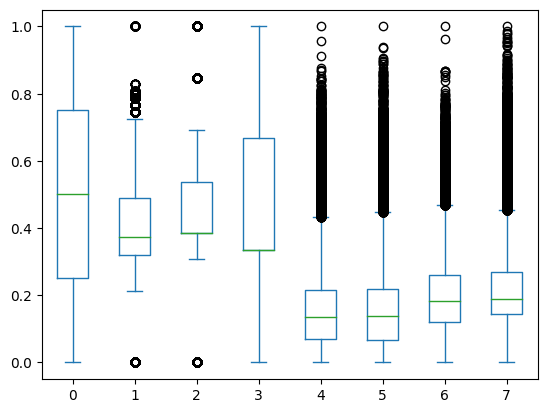

In [ ]:
temp  = pd.DataFrame(scaler.fit_transform(data_numeric))
temp.plot(kind = "box")

In [ ]:
round(data_numeric1.corr(),2)

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km)
Id,1.00,-0.01,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
Engine Size(L),-0.01,1.00,0.92,0.13,0.15,0.14,0.20,0.55
Cylinders,-0.00,0.92,1.00,0.16,0.16,0.14,0.20,0.54
Num Trans,0.00,0.13,0.16,1.00,0.03,0.03,0.04,0.13
Numeric Fuel City,-0.00,0.15,0.16,0.03,1.00,0.07,0.86,0.21
Numeric Fuel Hwy,-0.00,0.14,0.14,0.03,0.07,1.00,0.57,0.18
Numeric Fuel Comb,-0.00,0.20,0.20,0.04,0.86,0.57,1.00,0.26
CO2 Emissions(g/km),-0.00,0.55,0.54,0.13,0.21,0.18,0.26,1.00


In [ ]:
data_numeric1.isna().sum()

Id                         0
Engine Size(L)         23514
Cylinders              19875
Num Trans              17954
Numeric Fuel City       6048
Numeric Fuel Hwy        6488
Numeric Fuel Comb        592
CO2 Emissions(g/km)        0
dtype: int64

### Imputation Missing Value with Median Value

In [ ]:
data_numeric2 = data_numeric1.copy()
data_numeric2 = data_numeric2.fillna(data_numeric2.median())
data_numeric2.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km)
count,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000
mean,68571.000000,2.902397,4.975616,6.649696,13.991881,10.456294,12.460779,250.471627
std,39589.340971,1.141481,1.514564,1.215506,9.688375,7.401610,6.601754,76.956554
min,1.000000,1.000000,2.500000,4.000000,0.000000,0.000000,0.046700,96.000000
25%,34286.000000,2.000000,4.000000,6.000000,6.666667,4.830000,7.630000,201.000000
50%,68571.000000,2.500000,4.000000,6.000000,12.645968,9.330000,11.621294,234.000000
75%,102856.000000,3.500000,6.000000,8.000000,19.471440,14.610000,16.313214,291.000000
max,137141.000000,8.400000,12.000000,10.000000,92.592593,68.027211,62.893082,822.111635


<Axes: >

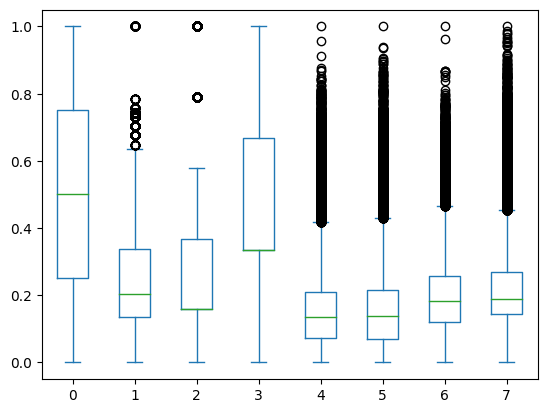

In [ ]:
temp  = pd.DataFrame(scaler.fit_transform(data_numeric2))
temp.plot(kind = "box")

### Trying Imputation with Mean Value

In [ ]:
data_numeric3 = data_numeric1.copy()
data_numeric3 = data_numeric3.fillna(data_numeric3.mean())
data_numeric3.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km)
count,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000
mean,68571.000000,2.985669,5.140970,6.747565,14.053975,10.512224,12.464418,250.471627
std,39589.340971,1.126708,1.460336,1.189062,9.684061,7.397354,6.601522,76.956554
min,1.000000,1.000000,2.500000,4.000000,0.000000,0.000000,0.046700,96.000000
25%,34286.000000,2.000000,4.000000,6.000000,6.666667,4.830000,7.630000,201.000000
50%,68571.000000,2.985669,5.000000,6.000000,13.245033,9.822010,11.660000,234.000000
75%,102856.000000,3.500000,6.000000,8.000000,19.471440,14.610000,16.313214,291.000000
max,137141.000000,8.400000,12.000000,10.000000,92.592593,68.027211,62.893082,822.111635


<Axes: >

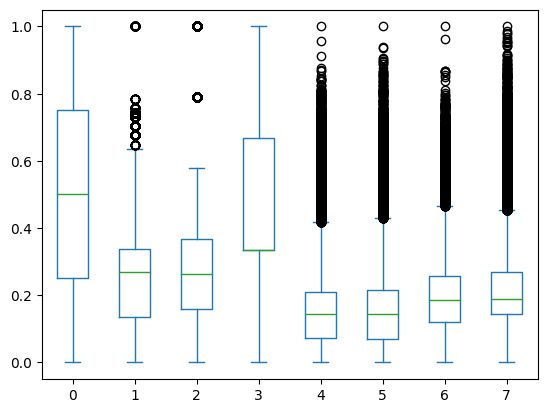

In [ ]:
temp  = pd.DataFrame(scaler.fit_transform(data_numeric3))
temp.plot(kind = "box")

## Tranformation

### Using SQRT

In [ ]:
import numpy as np

In [ ]:
c = 0.01

columns_to_exclude = ['Id', 'CO2 Emissions(g/km)']

df_transformed = data_numeric3.apply(lambda x: np.sqrt(x + c) if x.name not in columns_to_exclude and np.issubdtype(x.dtype, np.number) else x)
df_transformed.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km)
count,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000
mean,68571.000000,1.702542,2.249066,2.589928,3.502205,3.020908,3.402547,250.471627
std,39589.340971,0.311480,0.304421,0.223244,1.341100,1.181671,0.947153,76.956554
min,1.000000,1.004988,1.584298,2.002498,0.100000,0.100000,0.238118,96.000000
25%,34286.000000,1.417745,2.002498,2.451530,2.583925,2.200000,2.764055,201.000000
50%,68571.000000,1.730800,2.238303,2.451530,3.640746,3.135604,3.416138,234.000000
75%,102856.000000,1.873499,2.451530,2.830194,4.413778,3.823611,4.040200,291.000000
max,137141.000000,2.900000,3.465545,3.163858,9.623024,8.248467,7.931146,822.111635


<Axes: >

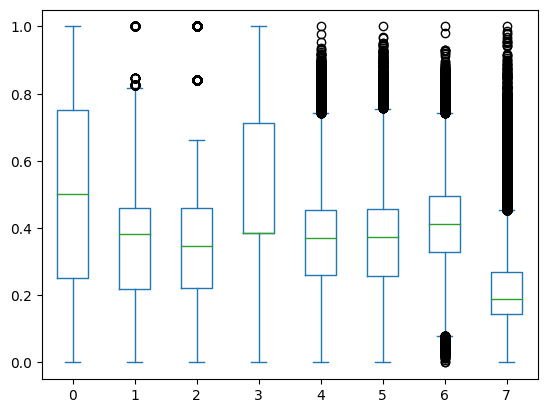

In [ ]:
temp  = pd.DataFrame(scaler.fit_transform(df_transformed))
temp.plot(kind = "box")

In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   137141 non-null  int64  
 1   Engine Size(L)       137141 non-null  float64
 2   Cylinders            137141 non-null  float64
 3   Num Trans            137141 non-null  float64
 4   Numeric Fuel City    137141 non-null  float64
 5   Numeric Fuel Hwy     137141 non-null  float64
 6   Numeric Fuel Comb    137141 non-null  float64
 7   CO2 Emissions(g/km)  137141 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 8.4 MB


## Feature Selection in Numerical Data

### Correlation Between Numerical Dataset

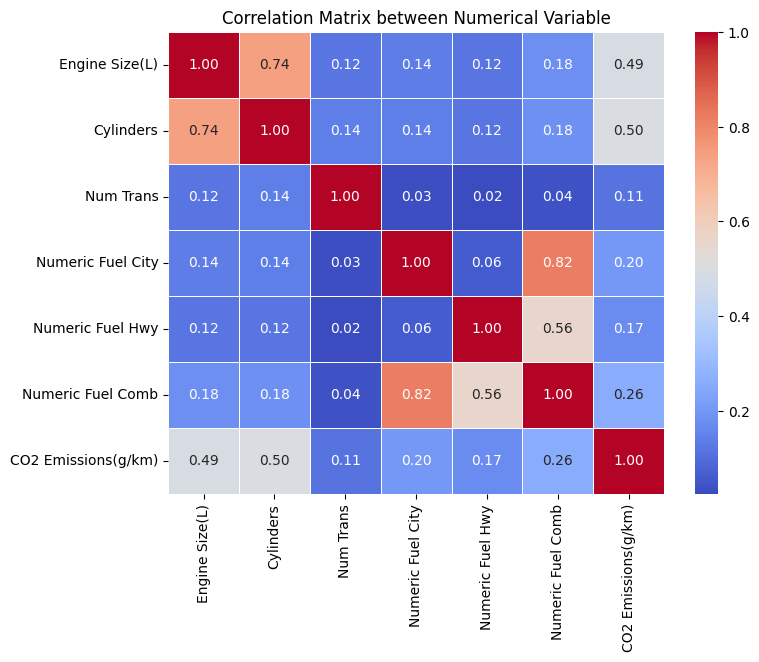

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


temp_cor = df_transformed.drop(columns=['Id'])
correlation_matrix = temp_cor.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix between Numerical Variable')
plt.show()

Numerical Fuel Comb and City have very strong positive correlation, then we can choose one variable between Combination or City.   
The correlation Fuel Combination with Target Variable is more strong than Fuel City. So, **Fuel Combination** can be choosen

### Univariate Feature Selection

In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   137141 non-null  int64  
 1   Engine Size(L)       137141 non-null  float64
 2   Cylinders            137141 non-null  float64
 3   Num Trans            137141 non-null  float64
 4   Numeric Fuel City    137141 non-null  float64
 5   Numeric Fuel Hwy     137141 non-null  float64
 6   Numeric Fuel Comb    137141 non-null  float64
 7   CO2 Emissions(g/km)  137141 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 8.4 MB


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

X_lab = df_transformed.columns.difference(['Id', 'CO2 Emissions(g/km)'])
X = df_transformed[X_lab]
y = df_transformed["CO2 Emissions(g/km)"]

# Select the top 5 features based on f_regression
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'P-value': p_values})

# Display the results
print(results_df)

             Feature         Score  P-value
0          Cylinders  45166.059131      0.0
1     Engine Size(L)  43765.067995      0.0
2          Num Trans   1750.563016      0.0
3  Numeric Fuel City   5689.346540      0.0
4  Numeric Fuel Comb   9806.957970      0.0
5   Numeric Fuel Hwy   4059.782901      0.0


### Regresi Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_lab = df_transformed.columns.difference(['Id', 'CO2 Emissions(g/km)'])
X = df_transformed[X_lab]
y = df_transformed["CO2 Emissions(g/km)"]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menggunakan regresi Lasso
lasso = Lasso(alpha=0.1)  # Atur alpha sesuai kebutuhan
lasso.fit(X_train_scaled, y_train)

# Menampilkan koefisien yang tidak nol
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['Cylinders', 'Engine Size(L)', 'Num Trans', 'Numeric Fuel City',
       'Numeric Fuel Comb', 'Numeric Fuel Hwy'],
      dtype='object')


In [ ]:
# MinMaxScaler in Data Numeric
columns_to_scale = df_transformed.columns.difference(['Id', 'CO2 Emissions(g/km)'])

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling pada kolom yang dipilih
df_numeric_clean = df_transformed.copy()
df_numeric_clean[columns_to_scale] = scaler.fit_transform(df_transformed[columns_to_scale])
df_numeric_clean.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel City,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km)
count,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000
mean,68571.000000,0.368100,0.353366,0.505812,0.357261,0.358461,0.411337,250.471627
std,39589.340971,0.164368,0.161819,0.192226,0.140827,0.145018,0.123118,76.956554
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000
25%,34286.000000,0.217812,0.222300,0.386643,0.260834,0.257717,0.328341,201.000000
50%,68571.000000,0.383012,0.347644,0.386643,0.371809,0.372537,0.413104,234.000000
75%,102856.000000,0.458315,0.460988,0.712695,0.452984,0.456971,0.494224,291.000000
max,137141.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,822.111635


In [ ]:
data_numeric_clean  = df_numeric_clean.drop(columns = ["Numeric Fuel City"])
data_numeric_clean.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km)
count,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000
mean,68571.000000,0.368100,0.353366,0.505812,0.358461,0.411337,250.471627
std,39589.340971,0.164368,0.161819,0.192226,0.145018,0.123118,76.956554
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000
25%,34286.000000,0.217812,0.222300,0.386643,0.257717,0.328341,201.000000
50%,68571.000000,0.383012,0.347644,0.386643,0.372537,0.413104,234.000000
75%,102856.000000,0.458315,0.460988,0.712695,0.456971,0.494224,291.000000
max,137141.000000,1.000000,1.000000,1.000000,1.000000,1.000000,822.111635


## Feature Selection ini Categorical Data

In [ ]:
df_cat = categoric_encoded.copy()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 68 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Id                              137141 non-null  int64
 1   Coded_ASURA                     137141 non-null  uint8
 2   Coded_BARUSU                    137141 non-null  uint8
 3   Coded_BMV                       137141 non-null  uint8
 4   Coded_CADILUXE                  137141 non-null  uint8
 5   Coded_CHEVO                     137141 non-null  uint8
 6   Coded_DOGE                      137141 non-null  uint8
 7   Coded_FIAR                      137141 non-null  uint8
 8   Coded_FOLD                      137141 non-null  uint8
 9   Coded_FOLKSWA                   137141 non-null  uint8
 10  Coded_GONDA                     137141 non-null  uint8
 11  Coded_JIPU                      137141 non-null  uint8
 12  Coded_KIO                       137141 non-n

### Drop Useless Encoded

In [ ]:
df_cat2 = df_cat.drop(columns = ['Coded_-1', 'Coded_missing', 'Coded_na', 'Coded_not-available', 'Coded_not-recorded', 'Coded_unestablished', 'Coded_unknown', 'Coded_unspecified'])
df_cat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Id                              137141 non-null  int64
 1   Coded_ASURA                     137141 non-null  uint8
 2   Coded_BARUSU                    137141 non-null  uint8
 3   Coded_BMV                       137141 non-null  uint8
 4   Coded_CADILUXE                  137141 non-null  uint8
 5   Coded_CHEVO                     137141 non-null  uint8
 6   Coded_DOGE                      137141 non-null  uint8
 7   Coded_FIAR                      137141 non-null  uint8
 8   Coded_FOLD                      137141 non-null  uint8
 9   Coded_FOLKSWA                   137141 non-null  uint8
 10  Coded_GONDA                     137141 non-null  uint8
 11  Coded_JIPU                      137141 non-null  uint8
 12  Coded_KIO                       137141 non-n

### Chi-Square Method

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import chi2_contingency

df_temp = df_cat2.merge(data_numeric_clean, left_on = "Id", right_on = "Id")
df_temp = df_temp.drop(columns = ["Id", "Engine Size(L)", "Cylinders",	"Num Trans", 	"Numeric Fuel Hwy", "Numeric Fuel Comb"])

for col1 in df_temp.columns[:-1]:  # Loop semua variabel kecuali variabel target
  contingency_table = pd.crosstab(df_temp[col1], df_temp["CO2 Emissions(g/km)"])
  chi2, p, _, _ = chi2_contingency(contingency_table)
  if p >= 0.05 :
    print(f"Chi-square test for {col1} and Target Var:")
    print(f"Chi-square value: {chi2}")
    print(f"P-value: {p}")
    print("\n")

Chi-square test for Coded_N and Target Var:
Chi-square value: 311.73567931107317
P-value: 1.0


Chi-square test for Coded_mi and Target Var:
Chi-square value: 3484.7632095937543
P-value: 1.0


Chi-square test for Coded_un and Target Var:
Chi-square value: 4621.404155897601
P-value: 0.11469170594094945




## GUNAIN DULU LAH YA WKWKWK

In [ ]:
df_merge = data_numeric_clean.merge(df_cat2, left_on = "Id", right_on = "Id")
df_merge.describe()

,Id,Engine Size(L),Cylinders,Num Trans,Numeric Fuel Hwy,Numeric Fuel Comb,CO2 Emissions(g/km),Coded_ASURA,Coded_BARUSU,Coded_BMV,...,Coded_X,Coded_Z,Coded_A,Coded_AM,Coded_AS,Coded_AV,Coded_M,Coded_mi,Coded_no,Coded_un
count,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,...,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000
mean,68571.000000,0.368100,0.353366,0.505812,0.358461,0.411337,250.471627,0.014875,0.029036,0.108881,...,0.618750,0.272012,0.192802,0.046616,0.436463,0.105621,0.167587,0.006154,0.018718,0.019010
std,39589.340971,0.164368,0.161819,0.192226,0.145018,0.123118,76.956554,0.121054,0.167908,0.311491,...,0.485696,0.444998,0.394500,0.210816,0.495948,0.307353,0.373500,0.078208,0.135528,0.136559
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34286.000000,0.217812,0.222300,0.386643,0.257717,0.328341,201.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68571.000000,0.383012,0.347644,0.386643,0.372537,0.413104,234.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102856.000000,0.458315,0.460988,0.712695,0.456971,0.494224,291.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,137141.000000,1.000000,1.000000,1.000000,1.000000,1.000000,822.111635,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137141 entries, 0 to 137140
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              137141 non-null  int64  
 1   Engine Size(L)                  137141 non-null  float64
 2   Cylinders                       137141 non-null  float64
 3   Num Trans                       137141 non-null  float64
 4   Numeric Fuel Hwy                137141 non-null  float64
 5   Numeric Fuel Comb               137141 non-null  float64
 6   CO2 Emissions(g/km)             137141 non-null  float64
 7   Coded_ASURA                     137141 non-null  uint8  
 8   Coded_BARUSU                    137141 non-null  uint8  
 9   Coded_BMV                       137141 non-null  uint8  
 10  Coded_CADILUXE                  137141 non-null  uint8  
 11  Coded_CHEVO                     137141 non-null  uint8  
 12  Coded_DOGE      

In [ ]:
df_merge.to_csv("data_clean.csv")

# Modelling

## Partition Data

In [ ]:
X = df_merge.drop(columns=['Id'])
X = X.drop(columns=['CO2 Emissions(g/km)'])

y = df_merge['CO2 Emissions(g/km)']
display(X)

,Engine Size(L),Cylinders,Num Trans,Numeric Fuel Hwy,Numeric Fuel Comb,Coded_ASURA,Coded_BARUSU,Coded_BMV,Coded_CADILUXE,Coded_CHEVO,...,Coded_X,Coded_Z,Coded_A,Coded_AM,Coded_AS,Coded_AV,Coded_M,Coded_mi,Coded_no,Coded_un
0,0.458315,0.460988,0.386643,0.292070,0.325622,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0.685672,0.364267,0.386643,0.668478,0.667241,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.577839,0.364267,0.386643,0.163010,0.146256,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0.383012,0.222300,0.386643,0.477235,0.482468,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0.385194,0.460988,0.514081,0.288586,0.452106,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137136,0.383012,0.662272,0.712695,0.328451,0.579249,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
137137,0.118117,0.222300,0.386643,0.102852,0.228085,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
137138,0.179616,0.222300,0.514081,0.343199,0.271742,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
137139,0.179616,0.222300,0.514081,0.046763,0.298150,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=123)

In [ ]:
from sklearn.metrics import mean_squared_error

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
                                  n_estimators=1000,
                                  criterion='squared_error',
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  random_state=123)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=1000, random_state=123)

In [ ]:
# Lakukan prediksi pada set pengujian
y_pred = rf_model.predict(X_test)

# Hitung RMSE pada set pengujian
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE on test set: {rmse_test}')


RMSE on test set: 48.895132616415125


## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

model = xgb.XGBRegressor(booster='gbtree',
                       n_estimators=5000, early_stopping_rounds=200,
                       objective='reg:linear', #max_depth=59, #21 terbaik menggunakan CPU
                       learning_rate=0.05,
                      #gamma=21, min_child_weight=27,
                      #num_parralel_tree=100,
                      # max_delta_step=9,
                      #grow_policy = 'lossguide',
                      #reg_alpha=1,
                      #colsample_bytree=1,
                      #subsample= 0.9,
                      #tree_method='gpu_hist',
                      # tree_method='approx',
                      #gpu_id=0,
                      random_state=123)
#model.fit(X_train, y_train,
#        eval_set=[(X_train, y_train), (X_test, y_test)],
#        verbose=25)

model.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:75.40932


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:13:52] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:50.01208
[200]	validation_0-rmse:48.69152
[300]	validation_0-rmse:48.17236
[400]	validation_0-rmse:47.93199
[500]	validation_0-rmse:47.74372
[600]	validation_0-rmse:47.60275
[700]	validation_0-rmse:47.53789
[800]	validation_0-rmse:47.54577
[900]	validation_0-rmse:47.52240
[1000]	validation_0-rmse:47.52386
[1100]	validation_0-rmse:47.52715
[1128]	validation_0-rmse:47.53476


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=200,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

## SVR

In [ ]:
from sklearn.svm import SVR
from math import sqrt
# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0)

# Fit the SVR model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')